<a href="https://colab.research.google.com/github/mickeyrahm/Portfolio/blob/master/notebooks/starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# --- Load and prepare data ---
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['dteday'] = pd.to_datetime(bikes['dteday'], errors='coerce')
bikes = bikes.dropna(subset=['dteday'])
bikes['total_riders'] = bikes['casual'] + bikes['registered']

display(bikes)

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,total_riders
0,2011-01-01,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,16
1,2011-01-01,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,38
2,2011-01-01,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,31
3,2011-01-01,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,12
4,2011-01-01,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1,835
112471,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1,621
112472,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1,578
112473,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1,363


In [ ]:
holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')
display(holdout)


,dteday,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,11/1/2023,0.0,6.0,3.8,0.6359,10.8,1,4,0,1
1,11/1/2023,1.0,6.0,3.4,0.6333,12.7,1,4,0,1
2,11/1/2023,2.0,5.3,2.6,0.6598,12.0,1,4,0,1
3,11/1/2023,3.0,5.1,3.8,0.6636,6.3,1,4,0,1
4,11/1/2023,4.0,4.0,1.8,0.7192,8.4,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...
1460,12/31/2023,19.0,6.9,4.8,0.5846,10.5,1,1,0,0
1461,12/31/2023,20.0,6.4,4.3,0.6305,10.1,1,1,0,0
1462,12/31/2023,21.0,6.4,4.0,0.6323,11.9,2,1,0,0
1463,12/31/2023,22.0,6.4,5.0,0.6597,7.1,2,1,0,0


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - loss: 135.4966 - mae: 135.9937 - mse: 54200.3906 - val_loss: 80.3540 - val_mae: 80.8484 - val_mse: 17616.8730
Epoch 2/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 78.4900 - mae: 78.9846 - mse: 17712.6738 - val_loss: 68.8837 - val_mae: 69.3774 - val_mse: 14579.8281
Epoch 3/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 69.3583 - mae: 69.8523 - mse: 14249.8828 - val_loss: 62.0653 - val_mae: 62.5580 - val_mse: 11532.7334
Epoch 4/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 64.3163 - mae: 64.8103 - mse: 11904.4307 - val_loss: 55.3796 - val_mae: 55.8726 - val_mse: 9567.5146
Epoch 5/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 59.6624 - mae: 60.1563 - mse: 10241.5576 - val_loss: 58.4842 - val_mae: 58.9791 - val_mse: 9841.1416
Epoch 6/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 56.5349 - mae: 57.0280 - mse: 9000.7158 - val_loss: 52.4824 - val_mae: 52.9748 - val_mse: 8322.7393
Epoch 7/50
2250/2

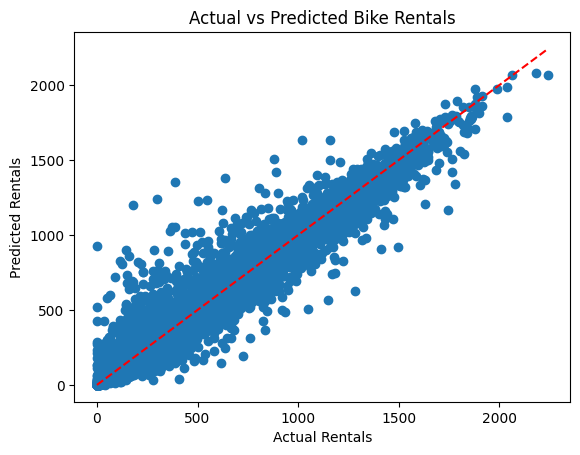

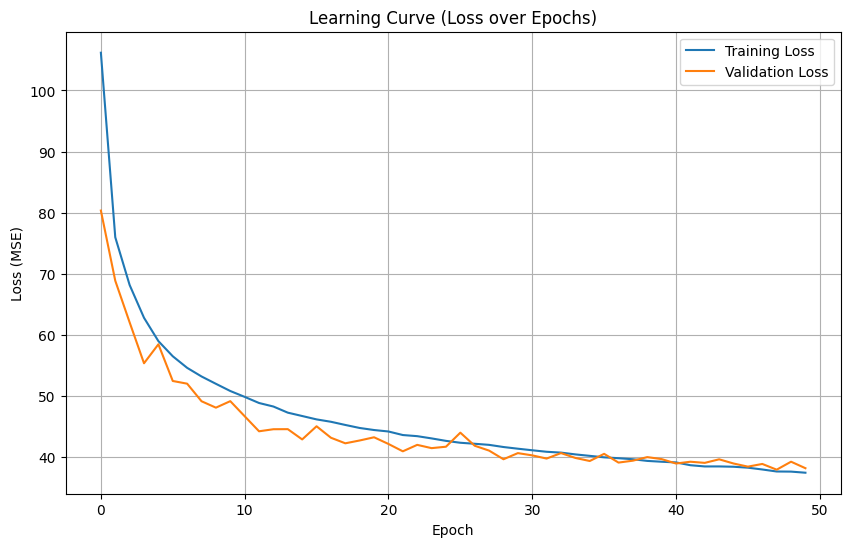

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.activations import swish
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load dataset
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Feature engineering
def feature_engineering(df):
    df['tot_rentals'] = df['casual'] + df['registered']
    df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['working_hours'] = ((df['hr'] >= 8) & (df['hr'] <= 17) & (df['workingday'] == 1)).astype(int)
    df['non_working_hours'] = df['hr'].map(lambda x: 1 if 18 <= x <= 22 else 0)
    df['sleep_hours'] = df['hr'].map(lambda x: 1 if (x >= 23 or x <= 7) else 0)
    df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['day'] = df['dteday'].dt.day
    df['dayofweek'] = df['dteday'].dt.dayofweek
    return df

# Apply feature engineering
bikes = feature_engineering(bikes)

# Interaction terms
bikes['temp_x_humidity'] = bikes['temp_c'] * bikes['hum']
bikes['temp_x_windspeed'] = bikes['temp_c'] * bikes['windspeed']
bikes['feelslike_x_hr'] = bikes['feels_like_c'] * bikes['hr']
bikes['workingday_x_hour'] = bikes['workingday'] * bikes['hr']
bikes['humidity_x_windspeed'] = bikes['hum'] * bikes['windspeed']
bikes['season_x_weather'] = bikes['season'] * bikes['weathersit']
bikes['temp_x_windspeed_x_humidity'] = bikes['temp_c'] * bikes['windspeed'] * bikes['hum']

bikes = pd.get_dummies(bikes, columns=['dayofweek', 'season', 'weathersit'], prefix=['day', 'season', 'weather'])


# Prepare features and target
X = bikes.drop(['tot_rentals', 'casual', 'registered', 'dteday'], axis=1)
y = bikes['tot_rentals']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model using Swish activation
model = keras.Sequential([
    layers.Dense(1024, activation=swish, input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(512, activation=swish),
    layers.Dense(256, activation=swish),
    layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=['mae', 'mse']
)



# Train model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluate model
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Predict and calculate R²
predictions = model.predict(X_test_scaled).flatten()
predictions = np.maximum(predictions, 0)  # Replace negative predictions with 0
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

# Print comparison for first 100 predictions
for i in range(100):
    print(f"Predicted: {predictions[i]:.0f}, Actual: {y_test.iloc[i]}")

# Plot predictions vs actuals
plt.scatter(y_test, predictions)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss over Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.activations import swish, relu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load dataset
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Feature engineering
def feature_engineering(df):
    df['tot_rentals'] = df['casual'] + df['registered']
    df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['working_hours'] = ((df['hr'] >= 8) & (df['hr'] <= 17) & (df['workingday'] == 1)).astype(int)
    df['non_working_hours'] = df['hr'].map(lambda x: 1 if 18 <= x <= 22 else 0)
    df['sleep_hours'] = df['hr'].map(lambda x: 1 if (x >= 23 or x <= 7) else 0)
    df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['day'] = df['dteday'].dt.day
    df['dayofweek'] = df['dteday'].dt.dayofweek
    return df

# Apply feature engineering
bikes = feature_engineering(bikes)

# Interaction terms
bikes['temp_x_humidity'] = bikes['temp_c'] * bikes['hum']
bikes['temp_x_windspeed'] = bikes['temp_c'] * bikes['windspeed']
bikes['feelslike_x_hr'] = bikes['feels_like_c'] * bikes['hr']
bikes['workingday_x_hour'] = bikes['workingday'] * bikes['hr']
bikes['humidity_x_windspeed'] = bikes['hum'] * bikes['windspeed']
bikes['season_x_weather'] = bikes['season'] * bikes['weathersit']
bikes['temp_x_windspeed_x_humidity'] = bikes['temp_c'] * bikes['windspeed'] * bikes['hum']

# One-hot encode categorical features
bikes = pd.get_dummies(bikes, columns=['dayofweek', 'season', 'weathersit'], prefix=['day', 'season', 'weather'])

# Prepare features and target
X = bikes.drop(['tot_rentals', 'casual', 'registered', 'dteday'], axis=1)
y = bikes['tot_rentals']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model
model = keras.Sequential([
    layers.Dense(1024, activation=swish, input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(512, activation=swish),
    layers.Dense(256, activation=relu),
    layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=['mae', 'mse']
)

# Set up EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=200,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluate model
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Predict and calculate R²
predictions = model.predict(X_test_scaled).flatten()
predictions = np.maximum(predictions, 0)
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

# Print comparison for first 100 predictions
for i in range(min(100, len(predictions))):
    print(f"Predicted: {predictions[i]:.0f}, Actual: {y_test.iloc[i]}")

# Plot predictions vs actuals
plt.scatter(y_test, predictions)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss over Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 191.8135 - mae: 192.3113 - mse: 100354.2031 - val_loss: 102.1102 - val_mae: 102.6052 - val_mse: 31270.7676
Epoch 2/50
145/360 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - loss: 101.5334 - mae: 102.0286 - mse: 30324.7793

KeyboardInterrupt: 

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.activations import swish
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

# Feature engineering
def feature_engineering(df):
    #df['tot_rentals'] = df['casual'] + df['registered']
    df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['working_hours'] = ((df['hr'] >= 8) & (df['hr'] <= 17) & (df['workingday'] == 1)).astype(int)
    df['non_working_hours'] = df['hr'].map(lambda x: 1 if 18 <= x <= 22 else 0)
    df['sleep_hours'] = df['hr'].map(lambda x: 1 if (x >= 23 or x <= 7) else 0)
    df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['day'] = df['dteday'].dt.day
    df['dayofweek'] = df['dteday'].dt.dayofweek
    return df

# Apply feature engineering
holdout = feature_engineering(holdout)

# Interaction terms
holdout['temp_x_humidity'] = holdout['temp_c'] * holdout['hum']
holdout['temp_x_windspeed'] = holdout['temp_c'] * holdout['windspeed']
holdout['feelslike_x_hr'] = holdout['feels_like_c'] * holdout['hr']
holdout['workingday_x_hour'] = holdout['workingday'] * holdout['hr']
holdout['humidity_x_windspeed'] = holdout['hum'] * holdout['windspeed']
holdout['season_x_weather'] = holdout['season'] * holdout['weathersit']
holdout['temp_x_windspeed_x_humidity'] = holdout['temp_c'] * holdout['windspeed'] * holdout['hum']

# One-hot encode categorical features
holdout = pd.get_dummies(holdout, columns=['dayofweek', 'season', 'weathersit'], prefix=['day', 'season', 'weather'])

# Prepare features and target
X = holdout.drop(['dteday'], axis=1)
y = holdout['tot_rentals']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model
model = keras.Sequential([
    layers.Dense(1024, activation=swish, input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(512, activation=swish),
    layers.Dense(256, activation=swish),
    layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics=['mae', 'mse']
)

# Add EarlyStopping but allow full 50 epochs
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluate model
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Predict and calculate R²
predictions = model.predict(X_test_scaled).flatten()
predictions = np.maximum(predictions, 0)  # Replace negative predictions with 0
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

# Print comparison for first 100 predictions
for i in range(100):
    print(f"Predicted: {predictions[i]:.0f}, Actual: {y_test.iloc[i]}")

# Plot predictions vs actuals
plt.scatter(y_test, predictions)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss over Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'tot_rentals'